# **ORIE 4580 Final Project**
Elena Pertsalis (ep447), Sophia Abatangelo (sia9), Emily Wanderer (ebw65), John Bush (jrb478), Isaac Singer (ibs27), Paige Herling (ph422)

# **Executive Summary**

Our main strategic imperative is to create a viable, flexible model for health officials to use during epidemics to determine which vaccination strategy to adopt in order to minimize the number of infections. 

Our model is based on the following assumptions. First, if an interaction occurs between a susceptible person and an infected person, the susceptible person becomes infected. Additionally, we assume that all infected people eventually become cured and resistant to the disease. Finally, we don’t have a hospital capacity so there is no capacity on the number of people that can receive medical treatment. 

We are modeling four clusters of people: Medical Workers (C1), Essential Non-Medical Workers (C2), Non-Essential High-Risk Population (C3), Non-Essential Low-Risk Population (C4). The model returns the number of infected people that got sick. We decided to create our model so that it focuses on reducing the number of infected symptomatic people. The parameters of our model are the recovery rate, the rate of vaccination, the size of each of the clusters, the probability of people in each cluster becoming sick if they are infected, the rate of interaction within each cluster, and the rate of interaction between clusters. 

We created four different “SIR_test” functions which simulate different orders of vaccinating the different clusters (functions are further explained in the Model Details section). In addition to these four vaccination strategies, officials can change the order of vaccination in the model. Out of the four vaccination strategies we studied, we discovered that the most effective one in minimizing the number of infected people is vaccinating groups of people in order of health risk. Thus, we would vaccinate the high risk population first, then medical workers, then essential non-medical workers and low-risk population last.

Our flexible model also allows health officials to study how different lockdown measures impact the number of people who become infected. The rates of interaction in our model can be adjusted by the user to see by how much interactions need to be decreased in order to minimize the amount of infected people. In the section of our model in which we test interaction reductions (further explained in the Model Analysis section), officials can either use our inputs or enter their own inputs for “r_reductions” to see how effective different levels of social distancing are in stopping the spread of the epidemic. We determined our inputs for the rates of interaction by using experiential knowledge about how much each group interacts within their own group and with other groups. We discovered that social distancing is only truly effective when everyone adheres to strict social distancing measures because we only saw a significant decrease in the number of infections when we decreased the rate of interaction of high-risk and low-risk people by 0.6 whereas with vaccination, the number of infections consistently decreased the more people that were vaccinated even if there were others who were not vaccinated yet. 

The tools can be developed further by adding an additional parameter which is the probability of an infected person transmitting the disease to a susceptible person during an interaction. This probability can be difficult to determine because the probability of transmission could depend on factors not easily quantified such as the strength of the susceptible person’s immune system. Another way in which the tool can be developed further is to create hospitals for symptomatic people and define a capacity for the hospitals. This realistic parameter will help better determine what lockdown measures and vaccination strategies to adopt.




# **Modeling approach, assumptions, parameters**

The framework of the simulation is designed so that different vaccinating strategies can be tested to see which strategy outputs the lowest number of symptomatic infected people. In our simulation of an epidemic, there are several classifications of people. These classes of individuals contain attributes that specify how many people are in each population, the rate at which the people in the group interact, and how likely the individuals in each class are to become symptomatic. Details of the classes and their respective attributes are below. 
The four different groups of people are:

1) healthcare workers (C1): the individuals in this group are on the front lines in fighting this epidemic. While they may have the highest grade of PPE, they are still highly susceptible in becoming infected with the virus as they are the only ones who interact with those that are infected. 

2) essential non-medical workers (C2): the individuals in this group experience high exposure to individuals belonging to all other groups, but do not have so much exposure to those who are hospitalized (infected and symptomatic). 

3) non-essential high risk individuals (C3): the individuals in this group are the most vulnerable of the population. They are most likely to be symptomatic if infected, and are most likely to require hospitalization. 

4) non-essential low-risk individuals (C4): the individuals in this group are the least likely to be symptomatic if infected. 

Each of the four classes above have the following subclasses:

1) Susceptible (S): An individual in this group has not yet been infected and is therefore at risk of becoming infected. 

2) Infected but Asymptomatic (A): An individual in this group is infected with the virus, but does not experience any of the symptoms. 

There are two more classes of people that we have defined that are made up of individuals from C1, C2, C3, and C4:

1) Infected Symptomatic (C5): The individuals in this group were once in C1, C2, C3, or C4 and became infected and showed symptoms. These people are the ones who require either hospitalization or quarantine and therefore either don’t interact with others, or mainly interact with people in C1. 

2) Resistant (C6): The individuals in this group were infected with the virus and have now become resistant. Their resistance can be a result of recovery due to time (at the rate 𝛽) or being vaccinated. The vaccines arrive according to a Poisson process with fixed rate γ per day. Resistant individuals can not infect others or be infected again. 

Within each of the four main classes of people, we define three inputs that drive our model:

1) The number of people in each group, given by n1, n2, n3, n4 respectively.

2) The probability of someone in that group becoming symptomatic after being infected, given by p1, p2, p3, p4 respectively. Those in group 3 are more likely to have symptoms compared to those in group 4, which would be shown by setting p3 >p4. Those in groups 1 and 2 are relatively equally likely to be or not to be symptomatic so reasonable values for p1 and p2 are 0.5 for both. Plausible values for this input are between 0 and 1. 

3) The rate at which people meet with each other. r_1, r_2, r_3, r_4 are intra-group interactions, whereas r_12, r_13, r_14, r_15, r_23, r_24, r_34 are intergroup meetings. Plausible values for this input are between 0 and 1. Based on experiential knowledge, low-risk individuals tend to interact relatively frequently with other low-risk people and high-risk people tend to not interact with many other high-risk people because they are high risk and thus, r_3 < r_4 and more specifically, we set r_3 equal to .2 and r_4 equal to 0.8. We set r_1 equal to 0.5 and r_2 equal to 0.5 which is reasonable because medical workers and essential workers continue to work during the epidemic and thus, interact with some people however they tend to be more careful and not interact as much as the low-risk population does. We set all the rates of intergroup interactions (r_12, r_13, r_14, r_15, r_23, r_24, r_34) to 0.5 for now because that is a pretty neutral value to set it to since we don't have a lot of information about how much groups interact with other groups. Since health officials have more information about the rates of intergroup interaction, they can input more accurate numbers into our model.

The performance measure of our simulation is the number of symptomatic infected individuals. This output is sensitive to changes in the values of the inputs listed above. 


# **Model Details**

Our simulation is run entirely in Python and uses Markov event simulation.

**Initialization:**
The simulation begins by creating our six classes (see below) using helper functions that initialize a class.  We also set our counts of interest to 0. Please see **Technical Appendix 2.1.**

**Events:**
As our simulation runs, events are generated using Markovian event simulation.   Events are one of three general types:

*   Infection Meeting - We simulate the meeting of individuals where one individual is infected (C1-A, C2-A, C3-A, C4-A, C5) and one is susceptible (C1-S, C2-S, C3-S, or C4-S).   This is further simplified by simulating the infection of a person from C1-S, C2-S, C3-S, or C4-S.  In our code, there are 4 different types of infection events: 
   - C1 infection - a member of C1-A, C2-A, C3-A, C4-A, or C5 infects a member of C1-S.
   - C2 infection - a member of C1-A, C2-A, C3-A, C4-A, or C5 infects a member of C2-S.
   - C3 infection - a member of C1-A, C2-A, C3-A, C4-A, or C5 infects a member of C3-S.
   - C4 infection - a member of C1-A, C2-A, C3-A, C4-A, or C5 infects a member of C4-S.
* Vaccination - Members of C1-S, C2-S, C3-S, and C4-S are vaccinated at a rate of $\gamma$ (gamma) infections per day.  We assume these occur independently of each other throughout the day.  When someone from a cluster is vaccinated, they are removed from their current cluster and put into the resistant cluster, C6.  When a vaccination is administered, the code checks to see if there is a susceptible person in the prioritized cluster to vaccinate.  If there is, the person is removed from C-S and put into resistant class C6.  If there is not, this process continues with the second, third, and fourth priority vaccination groups until someone is vaccinated.  Order of vaccination priority can be changed in the code. 
*   Recovery - Members of C1-A, C2-A, C3-A, C4-A, C5 recover at a rate of B.  B is generally represented by 1/(length of infection) as an input.  For example, if it takes 4 days for an infection to run its course, B is ¼.  We assume recoveries occur uniformly across infected agents and clusters.  The group from which an infected agent is chosen to recover is chosen by a uniform random variable.  The probability distribution is determined by a cluster’s number of infected individuals relative to the total number of infected individuals.  The probability that an individual from cluster C recovers is:

P(person in C[i] recovers) = # of infected individuals in C[i] / total # of infected individuals in C1, C2, C3, C4, and C5

Please see **Technical Appendix 2.2** for information on event simulation.

Below is a picture of the Markov chain that our model simulates:

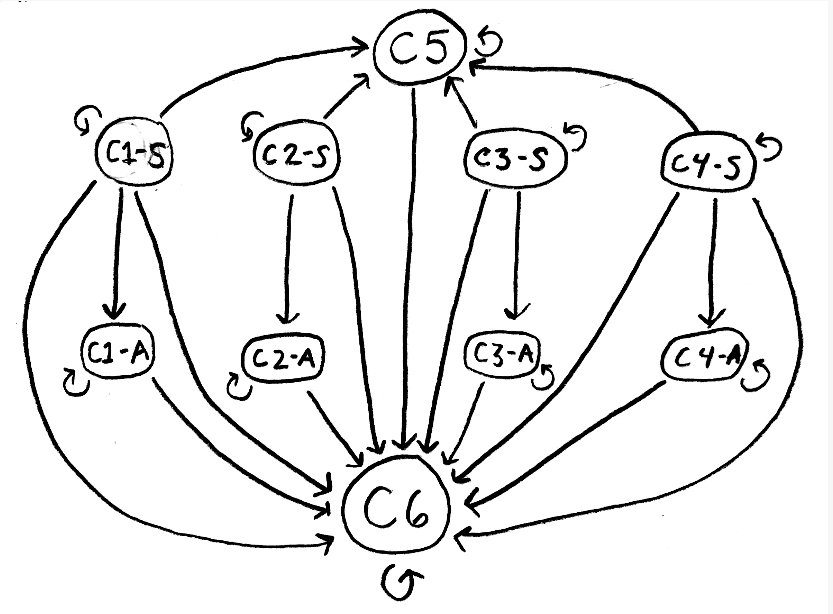

**Termination** - Our simulation ends when there are no more opportunities for new infection.  In our code, the simulation runs while there exists at least one infected individual and at least one susceptible individual.

**Information** - Different events also result in indexing of certain counts.  For example, we track the number of symptomatic infections by keeping a count that is initialized as 0 at the start of the simulation.  Another count included is the total number of infections.  These events are indexed whenever a corresponding event occurs.

**Usefulness** - This model and simulation is very helpful for decision making in terms of vaccinations and social distancing measures.  When deciding a vaccination strategy, the number of serious or total infections is important and these measures are tracked.  Of course, these simulations are subject to the error of estimating parameters.  However, when parameters are held still, varying social distancing and vaccination strategies provide excellent relative benchmarks to compare public health strategies.





# **Model Analysis**

In this model, we compared four different hypothetical vaccination strategies and their effectiveness at different levels of vaccine production.  We defined “effectiveness” as the ability of the strategy to lower the number of symptomatic cases in our population.  Limiting this number would lessen burdens on the local health services and the general public.  We simulated the different strategies when vaccines administered per day equaled 100, 300, and 500.  From each of these simulations, we produced bar charts that show the total number of symptomatic cases until completion of the epidemic, which is when there are no longer susceptible individuals in the population.

Vaccination Strategy #1 (S1): **Technical Appendix 3.0** for an explanation on implementing strategy types.

*   This strategy prioritizes those working in essential fields, starting with medical workers.
*   After all medical workers, we vaccinate all of the essential workers outside of medical fields.
*   From there, we vaccinate high-risk individuals.
*   Finally, we vaccinate low-risk individuals.

Vaccination Strategy #2 (S2):
*   This strategy prioritizes those with higher risk of severe, symptomatic infection by vaccinating them first.
*   Medical workers are then vaccinated.
*   Non-medical essential workers are then vaccinated.
*   Finally, low-risk, non-essential workers are vaccinated.

Vaccination Strategy #3 (S3):
*   This strategy aims to limit the spread of the virus, regardless of whether or not an individual is likely to experience symptoms, in hopes that a decrease in total infections results in a decrease in symptomatic cases.
*   Therefore we vaccinate the low-risk individuals first; they have the most interactions as a population.
*   Then we vaccinate medical workers.
*   Then essential non-medical workers.
*   Then we vaccinate the high-risk individuals; they interact at the lowest rates.

Vaccination Strategy #4 (S4):

*   This strategy also aims to limit the spread of the virus, regardless of whether or not an individual is likely to experience symptoms.
*   The difference between S3 and S4 is that S4 starts with medical workers, who have the highest cumulative rates of interaction.
*   Then low-risk individuals are vaccinated.
*   Following them are essential non-medical workers.
*   Lastly, because they have the fewest interactions, high-risk individuals are vaccinated.

With these four strategies, we estimated their effectiveness in lowering symptomatic cases with three different rates of vaccine production (𝛾) -- 100 per day, 300 per day, and 500 per day.  These estimates are produced by simulating 50 epidemics under the exact same conditions and taking the average number of symptomatic cases.

1) 𝛾 = 100 vaccines produced per day
**Technical Appendix 3.1**

2) 𝛾 = 300 vaccines produced per day
**Technical Appendix 3.2**

3) 𝛾 = 500 vaccines produced per day
**Technical Appendix 3.3**

For all three vaccination rates, it is evident that Strategy #2 significantly reduces symptomatic cases.

While having a vaccination strategy is important, containment of an epidemic also relies on reducing person-to-person contact and the consequent transmission of the virus.  Our model also shows how effective personal-distancing and lockdown measures can be in reducing the number of cases.  Using our model, we were able to show how decreasing the number of people an individual comes into contact with compares to increasing the number of vaccines administered per day.

**Technical Appendix 3.4**

**Technical Appendix 3.5**

From the figures, we can see that the relationship between vaccination rate and symptomatic cases is indirect and linear.  Figure 5 shows an indirect, exponential relationship between interaction reduction and symptomatic cases, but only once we reduce the number of preventable interactions by .45 per day.  Once we get to that point, we can see a drastic reduction in the number of symptomatic cases.  From this, we recommend that you encourage your constituents to avoid unnecessary interactions.  We also can see that these distancing recommendations require widespread support in order to reach the point at which symptomatic cases are reduced exponentially due to interactions being reduced.

# **Conclusions**

We’ve found that the order of vaccination strategies by effectiveness is constant, regardless of the number of vaccines given. The strategies in ascending order of symptomatic infections are:

S2: Vaccinate by health risk. 

S1: Vaccinating medical and essential workers first, then high risk and low risk people.

S4: Vaccinate groups with highest interaction rates first.

S3: Vaccinate the groups with the highest number of interactions first (population x rate)

This indicates that it is more effective to carefully determine who gets vaccinated, rather than just trying to vaccinate the entire population at the same rate. It is also clear that as gamma increases, the mean number of symptomatic infections linearly decreases, demonstrating that it is beneficial for health officials to vaccinate as many people as possible. Our model has also shown that when interaction rates are reduced, which is possible through social distancing guidelines, the total number of symptomatic infections dramatically decreases, and is often more effective at decreasing infections than vaccinations. However, a mass vaccination strategy is a more controlled method to decrease the spread of infection, and lockdown is only more effective than vaccinations when a significant majority of the population participates. Therefore, we recommend implementing lockdown measures in addition to a vaccination strategy. 

We believe that our model is effective in testing the impact of different vaccination strategies on the number of symptomatic infections. Health care officials can use this model by inputting different population sizes, vaccination rates, and transmission rates and the model will output the associated number of infections. This model can be extended to apply to other initiatives beyond vaccination, where the effects of interactions between clusters of people can be measured, such as for determining effective hospital capacities or lockdown efforts. 


# **Technical Appendices**

In [4]:
# Make sure we have the packages we need

import numpy as np
import scipy as sc
import math
import scipy.special
import matplotlib.pyplot as plt

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors

cmap=plt.get_cmap('Set3')

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep

In [6]:
# Animation 
def animate(results, interval=0):
    plt.figure()
    try:
        for result in results:

          # C1
          for person in range(result[0][0] + result[0][1]):
            if person < result[0][0]:
              plt.scatter(1, person, color='b')
            else: 
              plt.scatter(1, person, color='r')

          # C2
          for person in range(result[1][0] + result[1][1]):
            if person < result[1][0]:
              plt.scatter(2, person, color='b')
            else: 
              plt.scatter(2, person, color='r')
          
          # C3
          for person in range(result[2][0] + result[2][1]):
            if person < result[2][0]:
              plt.scatter(3, person, color='b')
            else: 
              plt.scatter(3, person, color='r')
          
          #C4
          for person in range(result[3][0] + result[3][1]):
            if person < result[3][0]:
              plt.scatter(4, person, color='b')
            else: 
              plt.scatter(4, person, color='r')

          #C5
          print(result[4])
          for person in range(result[4][0]):
              plt.scatter(5, person, color='r')

          #C6
          for person in range(result[5][0]):
            plt.scatter(6, person, color='g')

          plt.show()
          if interval:
              sleep(interval)
          clear_output(wait=True)
    except KeyboardInterrupt:
      pass

**Technical Appendix 2.1**

Below our 3 types of classes for the different populations are defined.  

Objects of BaseClass represent clusters of types C1, C2, C3, C4.  BaseClass keeps track of the total population, in addition to the number of susceptible and asymptomatic people.  Populations are numbers and there is not a concept of the individual, as we are more concerned with population dynamics.

Infected Symptomatic is initialized to create the cluster of individuals who are infected and symptomatic.  When we begin the simulation, no one is symptomatic.  We only keep track of the size of this cluster.

Resistant is initialized to keep track of the number of resistant population.  Like Infected Symptomatic, it is initialized with a population of zero and we only keep track of the population size.

In [7]:
# Define Base Class (Medical Workers, Essential Non-Medical Workers, Non-Essential High-Risk, Non-Essential Low-Risk,)
class BaseClass(object):
  def __init__(self, name, initpop, p):
    self.name = name
    self.population = initpop
    self.susceptible = initpop
    self.infectedAsymptomatic = 0
    self.infectedSymptomatic = 0 
    self.p = p


# Define Class of Symptomatic Infected Agents
class InfectedSymptomatic(object):
  def __init__(self):
    self.population = 0
    self.infectedSymptomatic = 0
    

# Define Class of Recovered Agents
class Resistant(object):
  def __init__(self):
    self.population = 0

# Function that decides if an infected individual is symptomatic or asymptomatic
def Infection(p, C, C5):
  random_U = np.random.uniform()
  C.susceptible -= 1
  if random_U <= p:
    C5.population += 1
    C5.infectedSymptomatic += 1
    C.population -= 1
  else:
    C.infectedAsymptomatic += 1


**Number of Infections With Vaccinating in order C1, C2, C3, C4**

Vaccinating medical and essential workers first, then high risk and low risk people.

**Technical Appendix 2.2.**

**Event Simulation:**

Events are simulated using exponential random variables.  The lambda rates are determined by inputs to the function and by population sizes.  For example, the lambda_rate_1_1 is the rate of interaction between group 1 times the number of interactions that can occur between existing members of the population times the probability that the interaction results in an infection.  For each type of infection (C1, C2, C3, or C4 gets infected), each event happens at a rate lambda[i], which the sum of all of the lambda rates that result in a member of C[i] being infected.

Gamma is simply the number of vaccinations per day.

A Recovery event occurs at rate B times the number of infected people who can recover.

**Technical Appendix 3.0.**

**Order of Vaccination:**
Under the comment #Vaccination, the code can be changed to experiment with different vaccination strategies.  


In [8]:
#vaccination strategy: C1, C2, C3, C4
def SIR_test1(B, gamma, n1, n2, n3, n4, p1, p2, p3, p4, r_1, r_2, r_3, r_4, r_12, r_13, 
        r_14, r_23, r_24, r_34, r_15):
  
  num_infected = 0
  total_infected_symptomatic = 0
  # Initialize Base Classes
  C1 = BaseClass(name="Medical Workers", initpop = n1, p = p1)
  C2 = BaseClass(name="Essential Non-Medical Workers", initpop = n2, p = p2)
  C3 = BaseClass(name="Non-Essential High-Risk", initpop = n3, p = p3)
  C4 = BaseClass(name="Non-Essential Low-Risk", initpop = n4, p = p4)
  # Initial Resistant and InfectedSymptomatic
  C5 = InfectedSymptomatic()
  C6 = Resistant()
  #Infect 20 individuals within the population among the 4 main clusters
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)

  
  # While there are susceptible people and infected people
  while ((C1.susceptible + C2.susceptible + C3.susceptible + C4.susceptible) > 0) and ((C1.infectedAsymptomatic + C2.infectedAsymptomatic + C3.infectedAsymptomatic + C4.infectedAsymptomatic + C5.population) > 0):

    # Determine Lambda Rates
    gamma = gamma 

    lambda_recovery = B * (C1.infectedAsymptomatic + C2.infectedAsymptomatic +
                           C3.infectedAsymptomatic + C4.infectedAsymptomatic + 
                           C5.population)
    # Lambda rate 1 times the probability of a meeting being an infection = rate of a class 1 infection
    lambda_1_1 = r_1 * (C1.population) * ((C1.susceptible*C1.infectedAsymptomatic)/max(sc.special.comb(C1.population,2),1))
    lambda_2_2 = r_2 * (C2.population) * ((C2.susceptible*C2.infectedAsymptomatic)/max(sc.special.comb(C2.population,2),1))
    lambda_3_3 = r_3 * (C3.population) * ((C3.susceptible*C3.infectedAsymptomatic)/max(sc.special.comb(C3.population,2),1))
    lambda_4_4 = r_4 * (C4.population) * ((C4.susceptible*C4.infectedAsymptomatic)/max(sc.special.comb(C4.population,2),1))
    #C2 infects C1
    lambda_2_1 = r_12 * ((C1.population + C2.population) * ((C1.susceptible*C2.infectedAsymptomatic)/max((C1.population * C2.population,1))))
    #C1 infect C2
    lambda_1_2 = r_12 * ((C1.population + C2.population) * ((C2.susceptible*C1.infectedAsymptomatic)/max((C1.population * C2.population,1))))
    lambda_3_1 = r_13 * ((C1.population + C3.population) * ((C1.susceptible*C3.infectedAsymptomatic)/max((C1.population * C3.population,1))))
    lambda_1_3 = r_13 * ((C1.population + C3.population) * ((C3.susceptible*C1.infectedAsymptomatic)/max((C1.population * C3.population,1))))
    lambda_4_1 = r_14 * ((C1.population + C4.population) * ((C1.susceptible*C4.infectedAsymptomatic)/max((C1.population * C4.population,1))))
    lambda_1_4 = r_14 * ((C1.population + C4.population) * ((C4.susceptible*C1.infectedAsymptomatic)/max((C1.population * C4.population,1))))
    lambda_2_3 = r_23 * ((C3.population + C2.population) * ((C3.susceptible*C2.infectedAsymptomatic)/max((C3.population * C2.population,1))))
    lambda_3_2 = r_23 * ((C3.population + C2.population) * ((C2.susceptible*C3.infectedAsymptomatic)/max((C3.population * C2.population,1))))
    lambda_2_4 = r_24 * ((C4.population + C2.population) * ((C4.susceptible*C2.infectedAsymptomatic)/max((C4.population * C2.population,1))))
    lambda_4_2 = r_24 * ((C4.population + C2.population) * ((C2.susceptible*C4.infectedAsymptomatic)/max((C4.population * C2.population,1))))
    lambda_3_4 = r_34 * ((C4.population + C3.population) * ((C4.susceptible*C3.infectedAsymptomatic)/max((C4.population * C3.population,1))))
    lambda_4_3 = r_34 * ((C4.population + C3.population) * ((C3.susceptible*C4.infectedAsymptomatic)/max((C4.population * C3.population,1))))
    lambda_5_1 = r_15 * ((C1.population + C5.population) * ((C5.population*C1.susceptible)/max((C1.population * C5.population, 1))))
    
    total_lambda = lambda_recovery + lambda_1_1 + lambda_2_2 + lambda_3_3 + lambda_4_4 + lambda_1_2 + lambda_1_3 + lambda_1_4 + lambda_2_3 + lambda_2_4 + lambda_3_4 + lambda_2_1 + lambda_3_1 + lambda_4_1 + lambda_3_2 + lambda_4_2 + lambda_4_3 + lambda_5_1 + gamma

    lambda_1 = lambda_1_1+lambda_2_1+lambda_3_1+lambda_4_1 + lambda_5_1
    lambda_2 = lambda_2_2+lambda_1_2+lambda_3_2+lambda_4_2
    lambda_3 = lambda_2_3+lambda_1_3+lambda_3_3+lambda_4_3
    lambda_4 = lambda_2_4+lambda_1_4+lambda_3_4+lambda_4_4

    # Create Event

    next_event = np.random.exponential(1/total_lambda)
    random_U = np.random.uniform()

    # Vaccination 
    if random_U < gamma/total_lambda:
      if C1.susceptible > 0:
          C1.susceptible -= 1
          C6.population += 1
      elif C2.susceptible > 0:
          C2.susceptible -= 1
          C6.population += 1
      elif C3.susceptible > 0:
          C3.susceptible -= 1
          C6.population += 1
      elif C4.susceptible > 0:
          C4.susceptible -= 1
          C6.population += 1

    # Infected Agent Recovers
    elif random_U < (lambda_recovery+gamma)/total_lambda:
      C1infected = C1.infectedAsymptomatic
      C2infected = C2.infectedAsymptomatic
      C3infected = C3.infectedAsymptomatic
      C4infected = C4.infectedAsymptomatic
      C5infected = C5.population
      totalinfected = C1infected + C2infected + C3infected + C4infected + C5infected 
      random_U = np.random.uniform()
      if random_U <= C1infected/totalinfected:
        C1.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected)/totalinfected:
        C2.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected+C3infected)/totalinfected:
        C3.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected+C3infected+C4infected)/totalinfected:
        C4.infectedAsymptomatic -= 1
        C6.population += 1
      else:
        C5.population -= 1
        C6.population += 1


    # C1 is infected 
    elif random_U < (gamma+lambda_recovery+lambda_1)/total_lambda:
      Infection(p = C1.p, C = C1, C5=C5)
      num_infected +=  1
      
    # C2 is infected
    elif random_U < (gamma+lambda_recovery+lambda_1+lambda_2)/total_lambda:
      Infection(p = C2.p, C = C2, C5=C5)
      num_infected +=  1
      
    # C3 is infected
    elif random_U < (gamma+lambda_recovery+lambda_1+lambda_2+lambda_3)/total_lambda:
      Infection(p = C3.p, C = C3, C5=C5)
      num_infected +=  1
     
    # C4 is infected
    else:
      Infection(p = C4.p, C = C4, C5=C5)
      num_infected +=  1
      # Update Results
      
  return C5.infectedSymptomatic



**Vaccinating in order of C3, C1, C2, C4.**

This is in order of health risk, with C3 being most at risk and C4 being least at risk

In [9]:
#vaccination strategy: C3, C1, C2, C4
def SIR_test2(B, gamma, n1, n2, n3, n4, p1, p2, p3, p4, r_1, r_2, r_3, r_4, r_12, r_13, 
        r_14, r_23, r_24, r_34, r_15):
  
  num_infected = 0
  total_infected_symptomatic = 0
  # Initialize Base Classes
  C1 = BaseClass(name="Medical Workers", initpop = n1, p = p1)
  C2 = BaseClass(name="Essential Non-Medical Workers", initpop = n2, p = p2)
  C3 = BaseClass(name="Non-Essential High-Risk", initpop = n3, p = p3)
  C4 = BaseClass(name="Non-Essential Low-Risk", initpop = n4, p = p4)
  # Initial Resistant and InfectedSymptomatic
  C5 = InfectedSymptomatic()
  C6 = Resistant()
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)

  
  # While there are susceptible people and infected people
  while ((C1.susceptible + C2.susceptible + C3.susceptible + C4.susceptible) > 0) and ((C1.infectedAsymptomatic + C2.infectedAsymptomatic + C3.infectedAsymptomatic + C4.infectedAsymptomatic + C5.population) > 0):

    # Determine Lambda Rates
    gamma = gamma 

    lambda_recovery = B * (C1.infectedAsymptomatic + C2.infectedAsymptomatic +
                           C3.infectedAsymptomatic + C4.infectedAsymptomatic + 
                           C5.population)
    # Lambda rate 1 times the probability of a meeting being an infection = rate of a class 1 infection
    lambda_1_1 = r_1 * (C1.population) * ((C1.susceptible*C1.infectedAsymptomatic)/max(sc.special.comb(C1.population,2),1))
    lambda_2_2 = r_2 * (C2.population) * ((C2.susceptible*C2.infectedAsymptomatic)/max(sc.special.comb(C2.population,2),1))
    lambda_3_3 = r_3 * (C3.population) * ((C3.susceptible*C3.infectedAsymptomatic)/max(sc.special.comb(C3.population,2),1))
    lambda_4_4 = r_4 * (C4.population) * ((C4.susceptible*C4.infectedAsymptomatic)/max(sc.special.comb(C4.population,2),1))
    #C2 infects C1
    lambda_2_1 = r_12 * ((C1.population + C2.population) * ((C1.susceptible*C2.infectedAsymptomatic)/max((C1.population * C2.population,1))))
    #C1 infect C2
    lambda_1_2 = r_12 * ((C1.population + C2.population) * ((C2.susceptible*C1.infectedAsymptomatic)/max((C1.population * C2.population,1))))
    lambda_3_1 = r_13 * ((C1.population + C3.population) * ((C1.susceptible*C3.infectedAsymptomatic)/max((C1.population * C3.population,1))))
    lambda_1_3 = r_13 * ((C1.population + C3.population) * ((C3.susceptible*C1.infectedAsymptomatic)/max((C1.population * C3.population,1))))
    lambda_4_1 = r_14 * ((C1.population + C4.population) * ((C1.susceptible*C4.infectedAsymptomatic)/max((C1.population * C4.population,1))))
    lambda_1_4 = r_14 * ((C1.population + C4.population) * ((C4.susceptible*C1.infectedAsymptomatic)/max((C1.population * C4.population,1))))
    lambda_2_3 = r_23 * ((C3.population + C2.population) * ((C3.susceptible*C2.infectedAsymptomatic)/max((C3.population * C2.population,1))))
    lambda_3_2 = r_23 * ((C3.population + C2.population) * ((C2.susceptible*C3.infectedAsymptomatic)/max((C3.population * C2.population,1))))
    lambda_2_4 = r_24 * ((C4.population + C2.population) * ((C4.susceptible*C2.infectedAsymptomatic)/max((C4.population * C2.population,1))))
    lambda_4_2 = r_24 * ((C4.population + C2.population) * ((C2.susceptible*C4.infectedAsymptomatic)/max((C4.population * C2.population,1))))
    lambda_3_4 = r_34 * ((C4.population + C3.population) * ((C4.susceptible*C3.infectedAsymptomatic)/max((C4.population * C3.population,1))))
    lambda_4_3 = r_34 * ((C4.population + C3.population) * ((C3.susceptible*C4.infectedAsymptomatic)/max((C4.population * C3.population,1))))
    lambda_5_1 = r_15 * ((C1.population + C5.population) * ((C5.population*C1.susceptible)/max((C1.population * C5.population, 1))))
    
    total_lambda = lambda_recovery + lambda_1_1 + lambda_2_2 + lambda_3_3 + lambda_4_4 + lambda_1_2 + lambda_1_3 + lambda_1_4 + lambda_2_3 + lambda_2_4 + lambda_3_4 + lambda_2_1 + lambda_3_1 + lambda_4_1 + lambda_3_2 + lambda_4_2 + lambda_4_3 + lambda_5_1 + gamma

    lambda_1 = lambda_1_1+lambda_2_1+lambda_3_1+lambda_4_1 + lambda_5_1
    lambda_2 = lambda_2_2+lambda_1_2+lambda_3_2+lambda_4_2
    lambda_3 = lambda_2_3+lambda_1_3+lambda_3_3+lambda_4_3
    lambda_4 = lambda_2_4+lambda_1_4+lambda_3_4+lambda_4_4

    # Create Event

    next_event = np.random.exponential(1/total_lambda)
    random_U = np.random.uniform()

    # Vaccination 
    if random_U < gamma/total_lambda:
      if C3.susceptible > 0:
          C3.susceptible -= 1
          C6.population += 1
      elif C1.susceptible > 0:
          C1.susceptible -= 1
          C6.population += 1
      elif C2.susceptible > 0:
          C2.susceptible -= 1
          C6.population += 1
      elif C4.susceptible > 0:
          C4.susceptible -= 1
          C6.population += 1

    # Infected Agent Recovers
    elif random_U < (lambda_recovery+gamma)/total_lambda:
      C1infected = C1.infectedAsymptomatic
      C2infected = C2.infectedAsymptomatic
      C3infected = C3.infectedAsymptomatic
      C4infected = C4.infectedAsymptomatic
      C5infected = C5.population
      totalinfected = C1infected + C2infected + C3infected + C4infected + C5infected 
      random_U = np.random.uniform()
      if random_U <= C1infected/totalinfected:
        C1.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected)/totalinfected:
        C2.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected+C3infected)/totalinfected:
        C3.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected+C3infected+C4infected)/totalinfected:
        C4.infectedAsymptomatic -= 1
        C6.population += 1
      else:
        C5.population -= 1
        C6.population += 1


    # C1 is infected 
    elif random_U < (gamma+lambda_recovery+lambda_1)/total_lambda:
      Infection(p = C1.p, C = C1, C5=C5)
      num_infected +=  1
      
    # C2 is infected
    elif random_U < (gamma+lambda_recovery+lambda_1+lambda_2)/total_lambda:
      Infection(p = C2.p, C = C2, C5=C5)
      num_infected +=  1
      
    # C3 is infected
    elif random_U < (gamma+lambda_recovery+lambda_1+lambda_2+lambda_3)/total_lambda:
      Infection(p = C3.p, C = C3, C5=C5)
      num_infected +=  1
     
    # C4 is infected
    else:
      Infection(p = C4.p, C = C4, C5=C5)
      num_infected +=  1
      # Update Results
      
  return C5.infectedSymptomatic



**Vaccinating C4, C1, C2, C3**

Vaccinating the groups with the highest number of interactions first (population x rate).

In [10]:
#vaccination strategy: C1, C2, C4, C3
def SIR_test3(B, gamma, n1, n2, n3, n4, p1, p2, p3, p4, r_1, r_2, r_3, r_4, r_12, r_13, 
        r_14, r_23, r_24, r_34, r_15):
  
  num_infected = 0
  total_infected_symptomatic = 0
  # Initialize Base Classes
  C1 = BaseClass(name="Medical Workers", initpop = n1, p = p1)
  C2 = BaseClass(name="Essential Non-Medical Workers", initpop = n2, p = p2)
  C3 = BaseClass(name="Non-Essential High-Risk", initpop = n3, p = p3)
  C4 = BaseClass(name="Non-Essential Low-Risk", initpop = n4, p = p4)
  # Initial Resistant and InfectedSymptomatic
  C5 = InfectedSymptomatic()
  C6 = Resistant()
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)

  
  # While there are susceptible people and infected people
  while ((C1.susceptible + C2.susceptible + C3.susceptible + C4.susceptible) > 0) and ((C1.infectedAsymptomatic + C2.infectedAsymptomatic + C3.infectedAsymptomatic + C4.infectedAsymptomatic + C5.population) > 0):

    # Determine Lambda Rates
    gamma = gamma 

    lambda_recovery = B * (C1.infectedAsymptomatic + C2.infectedAsymptomatic +
                           C3.infectedAsymptomatic + C4.infectedAsymptomatic + 
                           C5.population)
    # Lambda rate 1 times the probability of a meeting being an infection = rate of a class 1 infection
    lambda_1_1 = r_1 * (C1.population) * ((C1.susceptible*C1.infectedAsymptomatic)/max(sc.special.comb(C1.population,2),1))
    lambda_2_2 = r_2 * (C2.population) * ((C2.susceptible*C2.infectedAsymptomatic)/max(sc.special.comb(C2.population,2),1))
    lambda_3_3 = r_3 * (C3.population) * ((C3.susceptible*C3.infectedAsymptomatic)/max(sc.special.comb(C3.population,2),1))
    lambda_4_4 = r_4 * (C4.population) * ((C4.susceptible*C4.infectedAsymptomatic)/max(sc.special.comb(C4.population,2),1))
    #C2 infects C1
    lambda_2_1 = r_12 * ((C1.population + C2.population) * ((C1.susceptible*C2.infectedAsymptomatic)/max((C1.population * C2.population,1))))
    #C1 infect C2
    lambda_1_2 = r_12 * ((C1.population + C2.population) * ((C2.susceptible*C1.infectedAsymptomatic)/max((C1.population * C2.population,1))))
    lambda_3_1 = r_13 * ((C1.population + C3.population) * ((C1.susceptible*C3.infectedAsymptomatic)/max((C1.population * C3.population,1))))
    lambda_1_3 = r_13 * ((C1.population + C3.population) * ((C3.susceptible*C1.infectedAsymptomatic)/max((C1.population * C3.population,1))))
    lambda_4_1 = r_14 * ((C1.population + C4.population) * ((C1.susceptible*C4.infectedAsymptomatic)/max((C1.population * C4.population,1))))
    lambda_1_4 = r_14 * ((C1.population + C4.population) * ((C4.susceptible*C1.infectedAsymptomatic)/max((C1.population * C4.population,1))))
    lambda_2_3 = r_23 * ((C3.population + C2.population) * ((C3.susceptible*C2.infectedAsymptomatic)/max((C3.population * C2.population,1))))
    lambda_3_2 = r_23 * ((C3.population + C2.population) * ((C2.susceptible*C3.infectedAsymptomatic)/max((C3.population * C2.population,1))))
    lambda_2_4 = r_24 * ((C4.population + C2.population) * ((C4.susceptible*C2.infectedAsymptomatic)/max((C4.population * C2.population,1))))
    lambda_4_2 = r_24 * ((C4.population + C2.population) * ((C2.susceptible*C4.infectedAsymptomatic)/max((C4.population * C2.population,1))))
    lambda_3_4 = r_34 * ((C4.population + C3.population) * ((C4.susceptible*C3.infectedAsymptomatic)/max((C4.population * C3.population,1))))
    lambda_4_3 = r_34 * ((C4.population + C3.population) * ((C3.susceptible*C4.infectedAsymptomatic)/max((C4.population * C3.population,1))))
    lambda_5_1 = r_15 * ((C1.population + C5.population) * ((C5.population*C1.susceptible)/max((C1.population * C5.population, 1))))
    
    total_lambda = lambda_recovery + lambda_1_1 + lambda_2_2 + lambda_3_3 + lambda_4_4 + lambda_1_2 + lambda_1_3 + lambda_1_4 + lambda_2_3 + lambda_2_4 + lambda_3_4 + lambda_2_1 + lambda_3_1 + lambda_4_1 + lambda_3_2 + lambda_4_2 + lambda_4_3 + lambda_5_1 + gamma

    lambda_1 = lambda_1_1+lambda_2_1+lambda_3_1+lambda_4_1 + lambda_5_1
    lambda_2 = lambda_2_2+lambda_1_2+lambda_3_2+lambda_4_2
    lambda_3 = lambda_2_3+lambda_1_3+lambda_3_3+lambda_4_3
    lambda_4 = lambda_2_4+lambda_1_4+lambda_3_4+lambda_4_4

    # Create Event

    next_event = np.random.exponential(1/total_lambda)
    random_U = np.random.uniform()

    # Vaccination 
    if random_U < gamma/total_lambda:
      if C4.susceptible > 0:
          C4.susceptible -= 1
          C6.population += 1
      elif C1.susceptible > 0:
          C1.susceptible -= 1
          C6.population += 1
      elif C2.susceptible > 0:
          C2.susceptible -= 1
          C6.population += 1
      elif C3.susceptible > 0:
          C3.susceptible -= 1
          C6.population += 1

    # Infected Agent Recovers
    elif random_U < (lambda_recovery+gamma)/total_lambda:
      C1infected = C1.infectedAsymptomatic
      C2infected = C2.infectedAsymptomatic
      C3infected = C3.infectedAsymptomatic
      C4infected = C4.infectedAsymptomatic
      C5infected = C5.population
      totalinfected = C1infected + C2infected + C3infected + C4infected + C5infected 
      random_U = np.random.uniform()
      if random_U <= C1infected/totalinfected:
        C1.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected)/totalinfected:
        C2.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected+C3infected)/totalinfected:
        C3.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected+C3infected+C4infected)/totalinfected:
        C4.infectedAsymptomatic -= 1
        C6.population += 1
      else:
        C5.population -= 1
        C6.population += 1


    # C1 is infected 
    elif random_U < (gamma+lambda_recovery+lambda_1)/total_lambda:
      Infection(p = C1.p, C = C1, C5=C5)
      num_infected +=  1
      
    # C2 is infected
    elif random_U < (gamma+lambda_recovery+lambda_1+lambda_2)/total_lambda:
      Infection(p = C2.p, C = C2, C5=C5)
      num_infected +=  1
      
    # C3 is infected
    elif random_U < (gamma+lambda_recovery+lambda_1+lambda_2+lambda_3)/total_lambda:
      Infection(p = C3.p, C = C3, C5=C5)
      num_infected +=  1
     
    # C4 is infected
    else:
      Infection(p = C4.p, C = C4, C5=C5)
      num_infected +=  1
      # Update Results
      
  return C5.infectedSymptomatic



**C1, C4, C2, C3**

Vaccinating groups with highest interaction rates first.

In [11]:
#vaccination strategy: C1, C4, C2, C3
def SIR_test4(B, gamma, n1, n2, n3, n4, p1, p2, p3, p4, r_1, r_2, r_3, r_4, r_12, r_13, 
        r_14, r_23, r_24, r_34, r_15):
  
  num_infected = 0
  total_infected_symptomatic = 0
  # Initialize Base Classes
  C1 = BaseClass(name="Medical Workers", initpop = n1, p = p1)
  C2 = BaseClass(name="Essential Non-Medical Workers", initpop = n2, p = p2)
  C3 = BaseClass(name="Non-Essential High-Risk", initpop = n3, p = p3)
  C4 = BaseClass(name="Non-Essential Low-Risk", initpop = n4, p = p4)
  # Initial Resistant and InfectedSymptomatic
  C5 = InfectedSymptomatic()
  C6 = Resistant()
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p4, C = C4, C5=C5)
  Infection(p = p1, C = C1, C5=C5)
  Infection(p = p2, C = C2, C5=C5)
  Infection(p = p3, C = C3, C5=C5)
  Infection(p = p4, C = C4, C5=C5)

  
  # While there are susceptible people and infected people
  while ((C1.susceptible + C2.susceptible + C3.susceptible + C4.susceptible) > 0) and ((C1.infectedAsymptomatic + C2.infectedAsymptomatic + C3.infectedAsymptomatic + C4.infectedAsymptomatic + C5.population) > 0):

    # Determine Lambda Rates
    gamma = gamma 

    lambda_recovery = B * (C1.infectedAsymptomatic + C2.infectedAsymptomatic +
                           C3.infectedAsymptomatic + C4.infectedAsymptomatic + 
                           C5.population)
    # Lambda rate 1 times the probability of a meeting being an infection = rate of a class 1 infection
    lambda_1_1 = r_1 * (C1.population) * ((C1.susceptible*C1.infectedAsymptomatic)/max(sc.special.comb(C1.population,2),1))
    lambda_2_2 = r_2 * (C2.population) * ((C2.susceptible*C2.infectedAsymptomatic)/max(sc.special.comb(C2.population,2),1))
    lambda_3_3 = r_3 * (C3.population) * ((C3.susceptible*C3.infectedAsymptomatic)/max(sc.special.comb(C3.population,2),1))
    lambda_4_4 = r_4 * (C4.population) * ((C4.susceptible*C4.infectedAsymptomatic)/max(sc.special.comb(C4.population,2),1))
    #C2 infects C1
    lambda_2_1 = r_12 * ((C1.population + C2.population) * ((C1.susceptible*C2.infectedAsymptomatic)/max((C1.population * C2.population,1))))
    #C1 infect C2
    lambda_1_2 = r_12 * ((C1.population + C2.population) * ((C2.susceptible*C1.infectedAsymptomatic)/max((C1.population * C2.population,1))))
    lambda_3_1 = r_13 * ((C1.population + C3.population) * ((C1.susceptible*C3.infectedAsymptomatic)/max((C1.population * C3.population,1))))
    lambda_1_3 = r_13 * ((C1.population + C3.population) * ((C3.susceptible*C1.infectedAsymptomatic)/max((C1.population * C3.population,1))))
    lambda_4_1 = r_14 * ((C1.population + C4.population) * ((C1.susceptible*C4.infectedAsymptomatic)/max((C1.population * C4.population,1))))
    lambda_1_4 = r_14 * ((C1.population + C4.population) * ((C4.susceptible*C1.infectedAsymptomatic)/max((C1.population * C4.population,1))))
    lambda_2_3 = r_23 * ((C3.population + C2.population) * ((C3.susceptible*C2.infectedAsymptomatic)/max((C3.population * C2.population,1))))
    lambda_3_2 = r_23 * ((C3.population + C2.population) * ((C2.susceptible*C3.infectedAsymptomatic)/max((C3.population * C2.population,1))))
    lambda_2_4 = r_24 * ((C4.population + C2.population) * ((C4.susceptible*C2.infectedAsymptomatic)/max((C4.population * C2.population,1))))
    lambda_4_2 = r_24 * ((C4.population + C2.population) * ((C2.susceptible*C4.infectedAsymptomatic)/max((C4.population * C2.population,1))))
    lambda_3_4 = r_34 * ((C4.population + C3.population) * ((C4.susceptible*C3.infectedAsymptomatic)/max((C4.population * C3.population,1))))
    lambda_4_3 = r_34 * ((C4.population + C3.population) * ((C3.susceptible*C4.infectedAsymptomatic)/max((C4.population * C3.population,1))))
    lambda_5_1 = r_15 * ((C1.population + C5.population) * ((C5.population*C1.susceptible)/max((C1.population * C5.population, 1))))
    
    total_lambda = lambda_recovery + lambda_1_1 + lambda_2_2 + lambda_3_3 + lambda_4_4 + lambda_1_2 + lambda_1_3 + lambda_1_4 + lambda_2_3 + lambda_2_4 + lambda_3_4 + lambda_2_1 + lambda_3_1 + lambda_4_1 + lambda_3_2 + lambda_4_2 + lambda_4_3 + lambda_5_1 + gamma

    lambda_1 = lambda_1_1+lambda_2_1+lambda_3_1+lambda_4_1 + lambda_5_1
    lambda_2 = lambda_2_2+lambda_1_2+lambda_3_2+lambda_4_2
    lambda_3 = lambda_2_3+lambda_1_3+lambda_3_3+lambda_4_3
    lambda_4 = lambda_2_4+lambda_1_4+lambda_3_4+lambda_4_4

    # Create Event

    next_event = np.random.exponential(1/total_lambda)
    random_U = np.random.uniform()

    # Vaccination 
    if random_U < gamma/total_lambda:
      if C1.susceptible > 0:
          C1.susceptible -= 1
          C6.population += 1
      elif C4.susceptible > 0:
          C4.susceptible -= 1
          C6.population += 1
      elif C2.susceptible > 0:
          C2.susceptible -= 1
          C6.population += 1
      elif C3.susceptible > 0:
          C3.susceptible -= 1
          C6.population += 1

    # Infected Agent Recovers
    elif random_U < (lambda_recovery+gamma)/total_lambda:
      C1infected = C1.infectedAsymptomatic
      C2infected = C2.infectedAsymptomatic
      C3infected = C3.infectedAsymptomatic
      C4infected = C4.infectedAsymptomatic
      C5infected = C5.population
      totalinfected = C1infected + C2infected + C3infected + C4infected + C5infected 
      random_U = np.random.uniform()
      if random_U <= C1infected/totalinfected:
        C1.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected)/totalinfected:
        C2.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected+C3infected)/totalinfected:
        C3.infectedAsymptomatic -= 1
        C6.population += 1
      elif random_U <= (C1infected+C2infected+C3infected+C4infected)/totalinfected:
        C4.infectedAsymptomatic -= 1
        C6.population += 1
      else:
        C5.population -= 1
        C6.population += 1


    # C1 is infected 
    elif random_U < (gamma+lambda_recovery+lambda_1)/total_lambda:
      Infection(p = C1.p, C = C1, C5=C5)
      num_infected +=  1
      
    # C2 is infected
    elif random_U < (gamma+lambda_recovery+lambda_1+lambda_2)/total_lambda:
      Infection(p = C2.p, C = C2, C5=C5)
      num_infected +=  1
      
    # C3 is infected
    elif random_U < (gamma+lambda_recovery+lambda_1+lambda_2+lambda_3)/total_lambda:
      Infection(p = C3.p, C = C3, C5=C5)
      num_infected +=  1
     
    # C4 is infected
    else:
      Infection(p = C4.p, C = C4, C5=C5)
      num_infected +=  1
      # Update Results
      
  return C5.infectedSymptomatic



First, we will simulate the total number of symptomatic infections when 100 people are vaccinated per day.

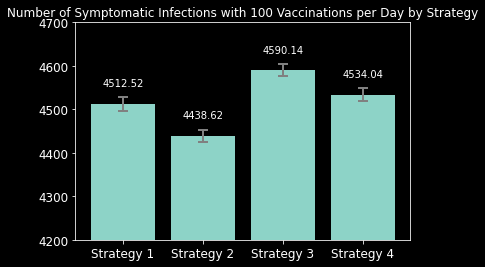

In [13]:
#Gamma = 100
fig = plt.figure()
fig.patch.set_facecolor('xkcd:black')

strategies = ["Strategy 1", "Strategy 2", "Strategy 3", "Strategy 4"]

s1_symptomatic = []
s2_symptomatic = []
s3_symptomatic = []
s4_symptomatic = []
# 50 simulations
for i in range(50):
  s1_symptomatic.append(SIR_test1(B=1/4, gamma = 100, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s2_symptomatic.append(SIR_test2(B=1/4, gamma = 100, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s3_symptomatic.append(SIR_test3(B=1/4, gamma = 100, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s4_symptomatic.append(SIR_test4(B=1/4, gamma = 100, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
s1mean = np.mean(s1_symptomatic)
s1sd = np.std(s1_symptomatic)
s2mean = np.mean(s2_symptomatic)
s2sd = np.std(s2_symptomatic)
s3mean = np.mean(s3_symptomatic)
s3sd = np.std(s3_symptomatic)
s4mean = np.mean(s4_symptomatic)
s4sd = np.std(s4_symptomatic)
num_symptomatic = [s1mean, s2mean, s3mean, s4mean]

errorS1 = (1.96*s1sd)/(np.sqrt(50))
errorS2 = (1.96*s2sd)/(np.sqrt(50))
errorS3 = (1.96*s3sd)/(np.sqrt(50))
errorS4 = (1.96*s4sd)/(np.sqrt(50))

errors = [errorS1, errorS2, errorS3, errorS4]

plt.bar(strategies, num_symptomatic, yerr=errors, error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
plt.ylim(4200,4700)
for index, value in enumerate(num_symptomatic):
  plt.text(index-.25, value+40, str(value))
plt.title("Number of Symptomatic Infections with 100 Vaccinations per Day by Strategy")
plt.show()


**Technical Appendix 3.1** (above)

Figure 1: Bar chart showing symptomatic infections with 100 vaccinations per day for each strategy (Includes 95% confidence intervals for 50 trials of each strategy).

Gamma = 300

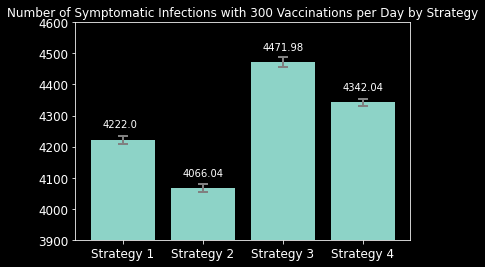

In [14]:
#Gamma = 300
fig = plt.figure()
fig.patch.set_facecolor('xkcd:black')

strategies = ["Strategy 1", "Strategy 2", "Strategy 3", "Strategy 4"]

s1_symptomatic = []
s2_symptomatic = []
s3_symptomatic = []
s4_symptomatic = []
# 50 simulations
for i in range(50):
  s1_symptomatic.append(SIR_test1(B=1/4, gamma = 300, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s2_symptomatic.append(SIR_test2(B=1/4, gamma = 300, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s3_symptomatic.append(SIR_test3(B=1/4, gamma = 300, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s4_symptomatic.append(SIR_test4(B=1/4, gamma = 300, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
s1mean = np.mean(s1_symptomatic)
s1sd = np.std(s1_symptomatic)
s2mean = np.mean(s2_symptomatic)
s2sd = np.std(s2_symptomatic)
s3mean = np.mean(s3_symptomatic)
s3sd = np.std(s3_symptomatic)
s4mean = np.mean(s4_symptomatic)
s4sd = np.std(s4_symptomatic)
num_symptomatic = [s1mean, s2mean, s3mean, s4mean]

errorS1 = (1.96*s1sd)/(np.sqrt(50))
errorS2 = (1.96*s2sd)/(np.sqrt(50))
errorS3 = (1.96*s3sd)/(np.sqrt(50))
errorS4 = (1.96*s4sd)/(np.sqrt(50))

errors = [errorS1, errorS2, errorS3, errorS4]

plt.bar(strategies, num_symptomatic, yerr=errors, error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
for index, value in enumerate(num_symptomatic):
  plt.text(index-.25, value+40, str(value))
plt.ylim(3900,4600)
plt.title("Number of Symptomatic Infections with 300 Vaccinations per Day by Strategy")
plt.show()

**Technical Appendix 3.2** (above)

Figure 2: Bar chart showing symptomatic infections with 300 vaccinations per day for each strategy (Includes 95% confidence intervals for 50 trials of each strategy).

Gamma = 500

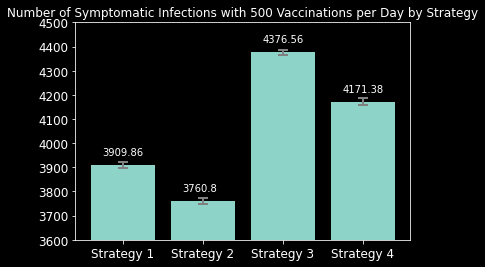

In [15]:
#Gamma = 500
fig = plt.figure()
fig.patch.set_facecolor('xkcd:black')

strategies = ["Strategy 1", "Strategy 2", "Strategy 3", "Strategy 4"]

s1_symptomatic = []
s2_symptomatic = []
s3_symptomatic = []
s4_symptomatic = []
# 50 simulations
for i in range(50):
  s1_symptomatic.append(SIR_test1(B=1/4, gamma = 500, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s2_symptomatic.append(SIR_test2(B=1/4, gamma = 500, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s3_symptomatic.append(SIR_test3(B=1/4, gamma = 500, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
  s4_symptomatic.append(SIR_test4(B=1/4, gamma = 500, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5))
s1mean = np.mean(s1_symptomatic)
s1sd = np.std(s1_symptomatic)
s2mean = np.mean(s2_symptomatic)
s2sd = np.std(s2_symptomatic)
s3mean = np.mean(s3_symptomatic)
s3sd = np.std(s3_symptomatic)
s4mean = np.mean(s4_symptomatic)
s4sd = np.std(s4_symptomatic)
num_symptomatic = [s1mean, s2mean, s3mean, s4mean]

errorS1 = (1.96*s1sd)/(np.sqrt(50))
errorS2 = (1.96*s2sd)/(np.sqrt(50))
errorS3 = (1.96*s3sd)/(np.sqrt(50))
errorS4 = (1.96*s4sd)/(np.sqrt(50))

errors = [errorS1, errorS2, errorS3, errorS4]

plt.bar(strategies, num_symptomatic, yerr=errors, error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))
for index, value in enumerate(num_symptomatic):
  plt.text(index-.25, value+40, str(value))
plt.ylim(3600,4500)
plt.title("Number of Symptomatic Infections with 500 Vaccinations per Day by Strategy")
plt.show()


**Technical Appendix 3.3** (above)

Figure 3: Bar chart showing symptomatic infections with 500 vaccinations per day for each strategy (Includes 95% confidence intervals for 50 trials for each strategy).

The estimated number of symptomatic infections when gamma is 0 is 4661.48.
95% Confidence Interval: [4648.319276166289, 4674.640723833711]
The estimated number of symptomatic infections when gamma is 100 is 4506.78.
95% Confidence Interval: [4493.085527267865, 4520.474472732135]
The estimated number of symptomatic infections when gamma is 200 is 4364.12.
95% Confidence Interval: [4351.460203571179, 4376.779796428821]
The estimated number of symptomatic infections when gamma is 300 is 4220.42.
95% Confidence Interval: [4206.636743741946, 4234.203256258054]
The estimated number of symptomatic infections when gamma is 400 is 4062.98.
95% Confidence Interval: [4050.6336191283763, 4075.3263808716238]
The estimated number of symptomatic infections when gamma is 500 is 3893.62.
95% Confidence Interval: [3879.554038185065, 3907.6859618149347]
The estimated number of symptomatic infections when gamma is 600 is 3751.98.
95% Confidence Interval: [3739.2827708476534, 3764.6772291523466]
[4661.48, 

Text(0.5, 1.0, 'Number of Symptomatic Cases for S1 for Increasing Vaccine Production')

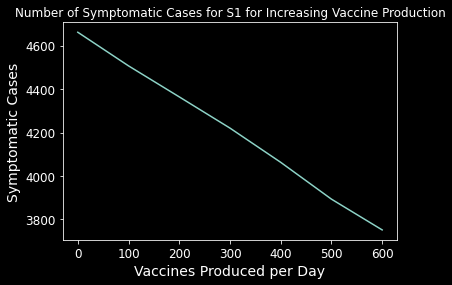

In [16]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:black')
gammas = [0, 100, 200, 300, 400, 500, 600]
num_infections = []
for gamma_val in gammas:
  gamma_num_infected = []
  # 50 simulations
  for i in range(50):
    #r_1 is .5 because health care workers have a decent amount of interaction
    #r_2 is .5 because essential non health care workers also have a decent amount of interactions
    #r_3 is .2 because high risk individuals do not have much interaction
    #r_4 is .8 because low risk individuals have many interactions
    #other r values are all the same because rate of interactions are about the same for all groups of people
    num_infected = SIR_test1(B=1/4, gamma = gamma_val, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=.2, r_4=.8, r_12=.5, r_13=.5, r_14=.5, r_23=.5, r_24=.5, r_34=.5, r_15=.5)
    gamma_num_infected.append(num_infected)
  mean = np.mean(gamma_num_infected)
  sd = np.std(gamma_num_infected)
  lower_bound = mean - (1.96*sd)/(np.sqrt(50))
  upper_bound = mean + (1.96*sd)/(np.sqrt(50))
  print("The estimated number of symptomatic infections when gamma is " + str(gamma_val) + " is "+ str(mean) + ".")
  print("95% Confidence Interval: [" + str(lower_bound) +", " + str(upper_bound) + "]")
  num_infections.append(mean)
print(num_infections)
plt.plot(gammas, num_infections)
plt.xlabel("Vaccines Produced per Day")
plt.ylabel("Symptomatic Cases")
plt.title("Number of Symptomatic Cases for S1 for Increasing Vaccine Production")

**Technical Appendix 3.4** (above)

Figure 4: shows number symptomatic cases as the rate of vaccinations increases.

Studying Various Lockdown Measures

The estimated number of symptomatic infections when R-values are reduced by 0 is 4497.32.
95% Confidence Interval: [4484.928032411146, 4509.711967588853]
The estimated number of symptomatic infections when R-values are reduced by 0.15 is 4467.46.
95% Confidence Interval: [4455.868962347193, 4479.051037652807]
The estimated number of symptomatic infections when R-values are reduced by 0.3 is 4412.12.
95% Confidence Interval: [4399.352873531636, 4424.887126468364]
The estimated number of symptomatic infections when R-values are reduced by 0.45 is 4137.2.
95% Confidence Interval: [4120.403726279916, 4153.996273720084]
The estimated number of symptomatic infections when R-values are reduced by 0.6 is 2740.48.
95% Confidence Interval: [2719.1634710746052, 2761.796528925395]
The estimated number of symptomatic infections when R-values are reduced by 0.75 is 1635.62.
95% Confidence Interval: [1613.1436012310867, 1658.096398768913]
The estimated number of symptomatic infections when R-values a

Text(0.5, 1.0, 'Number of Symptomatic Cases with Decreasing Interaction Rates')

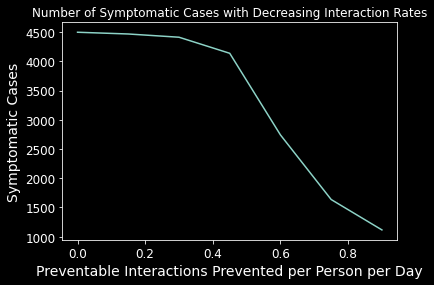

In [17]:
# Studying Different Lockdown Measures
fig = plt.figure()
fig.patch.set_facecolor('xkcd:black')
r_reductions = [0, .15, .3, .45, .6, .75, .9]
num_infections = []
for r in r_reductions:
  reduced_infections = []
  # 50 simulations
  for i in range(50):
    num_infected = SIR_test1(B=1/4, gamma = 100, n1=720, n2=2200, n3=2000, n4=8000, p1=.5, p2=.5, p3=.8, p4=.2, r_1=.5, r_2=.5, r_3=np.max(.2-r,0) , r_4=np.max(.8-r,0), r_12=.5, r_13=.5, r_14=.5, r_23=np.max(.5-r,0), r_24=np.max(.5-r,0), r_34=np.max(.5-r,0), r_15=.5)
    reduced_infections.append(num_infected)
  mean = np.mean(reduced_infections)
  sd = np.std(reduced_infections)
  lower_bound = mean - (1.96*sd)/(np.sqrt(50))
  upper_bound = mean + (1.96*sd)/(np.sqrt(50))
  print("The estimated number of symptomatic infections when R-values are reduced by " + str(r) + " is "+ str(mean) + ".")
  print("95% Confidence Interval: [" + str(lower_bound) +", " + str(upper_bound) + "]")
  num_infections.append(mean)
print(num_infections)
plt.plot(r_reductions, num_infections)
plt.xlabel("Preventable Interactions Prevented per Person per Day")
plt.ylabel("Symptomatic Cases")
plt.title("Number of Symptomatic Cases with Decreasing Interaction Rates")


**Technical Appendix 3.5** (above)

Figure 5: shows number of symptomatic cases as preventable interactions are reduced.